In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=32df932ee734b934ec0dbd795beb910e9ec01fafda916ced402d9ee1ba01e20d
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [8]:
import wget

In [9]:
wget.download('https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip')

'cats_and_dogs_filtered.zip'

In [76]:
wget.download("https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")

'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [10]:
data = './'

In [11]:
!unzip -q cats_and_dogs_filtered.zip -d $data

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout 

In [205]:
pre_train_model = InceptionV3(
      include_top = False,
      weights = "imagenet",
      input_shape = (200,200,3)
)
### pre_train_model.load_weights('/content/gdrive/My Drive/cats_and_dogs_filtered/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
pre_train_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 99, 99, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 99, 99, 32)   96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 99, 99, 32)   0           batch_normalization_940[0][0]    
_______________________________________________________________________________________

In [206]:
for layers in pre_train_model.layers:
    layers.trainable = False

pre_train_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 99, 99, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 99, 99, 32)   96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 99, 99, 32)   0           batch_normalization_940[0][0]    
_______________________________________________________________________________________

In [207]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers

In [208]:
x = layers.Flatten()(pre_train_model.get_layer('mixed10').output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)


model = Model(
      pre_train_model.input,
      x
)

model.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy',
      metrics = ['acc']
)

model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 99, 99, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 99, 99, 32)   96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 99, 99, 32)   0           batch_normalization_940[0][0]    
______________________________________________________________________________________

In [209]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [210]:
gen_train = ImageDataGenerator(
      rescale = 1/255,
      rotation_range = 40,
      width_shift_range = 0.4,
      height_shift_range = 0.4,
      zoom_range = 0.5,
      fill_mode = 'nearest',
      horizontal_flip = True
)

In [211]:
gen_valid = ImageDataGenerator(
      rescale = 1/255,
      rotation_range = 40,
      width_shift_range = 0.4,
      height_shift_range = 0.4,
      zoom_range = 0.5,
      fill_mode = 'nearest',
      horizontal_flip = True
)

In [212]:
cd /content/gdrive/My Drive/cats_and_dogs_filtered

/content/gdrive/My Drive/cats_and_dogs_filtered


In [213]:
train_data = "./train"
valid_data = "./validation"

In [214]:
train = gen_train.flow_from_directory(
      train_data,
      target_size = (200,200),
      class_mode = 'binary',
      batch_size = 32,
)

Found 2000 images belonging to 2 classes.


In [215]:
valid = gen_valid.flow_from_directory(
      valid_data,
      target_size = (200,200),
      class_mode = 'binary',
      batch_size = 32
)

Found 1000 images belonging to 2 classes.


In [216]:
H = model.fit_generator(
      train,
      steps_per_epoch = 2000//32,
      epochs = 1,
      verbose = 1,
      validation_data = valid,
      validation_steps = 1000//32
)

62/62 [==============================] - 36s 583ms/step - loss: 7.2687 - acc: 0.8318 - val_loss: 1.4960 - val_acc: 0.9012


In [217]:
for layer in model.layers:
    layer.trainable = True

model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 99, 99, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 99, 99, 32)   96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 99, 99, 32)   0           batch_normalization_940[0][0]    
______________________________________________________________________________________

In [218]:
H = model.fit_generator(
      train,
      steps_per_epoch = 2000//32,
      epochs = 20,
      verbose = 1,
      validation_data = valid,
      validation_steps = 1000//32
)

Epoch 1/20
62/62 [==============================] - 35s 569ms/step - loss: 1.3277 - acc: 0.8862 - val_loss: 0.7061 - val_acc: 0.9113
Epoch 2/20
62/62 [==============================] - 35s 561ms/step - loss: 0.4571 - acc: 0.8979 - val_loss: 0.1868 - val_acc: 0.9214
Epoch 3/20
62/62 [==============================] - 35s 570ms/step - loss: 0.2242 - acc: 0.9024 - val_loss: 0.2207 - val_acc: 0.8972
Epoch 4/20
62/62 [==============================] - 35s 559ms/step - loss: 0.1961 - acc: 0.9065 - val_loss: 0.1954 - val_acc: 0.9133
Epoch 5/20
62/62 [==============================] - 35s 562ms/step - loss: 0.2375 - acc: 0.9055 - val_loss: 0.1951 - val_acc: 0.9073
Epoch 6/20
62/62 [==============================] - 35s 562ms/step - loss: 0.2108 - acc: 0.9182 - val_loss: 0.2353 - val_acc: 0.9052
Epoch 7/20
62/62 [==============================] - 35s 562ms/step - loss: 0.2241 - acc: 0.9007 - val_loss: 0.2284 - val_acc: 0.9012
Epoch 8/20
62/62 [==============================] - 35s 559ms/step - 

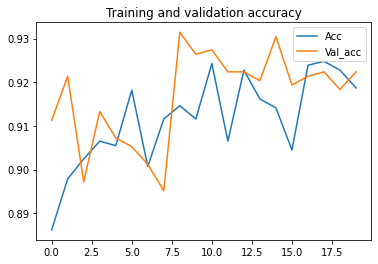

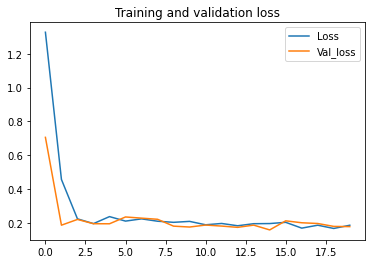

In [221]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = H.history[     'acc' ]
val_acc  = H.history[ 'val_acc' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc ,label = "Acc")
plt.plot  ( epochs, val_acc, label = "Val_acc")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label = "Loss")
plt.plot  ( epochs, val_loss, label = "Val_loss")
plt.title ('Training and validation loss'   )
plt.legend()

In [185]:
valid.class_indices

{'cats': 0, 'dogs': 1}

Saving 932545cd434c490fb8875ad0daa275a7.jpg to 932545cd434c490fb8875ad0daa275a7.jpg
Classes's values =  [[0.02630758]]


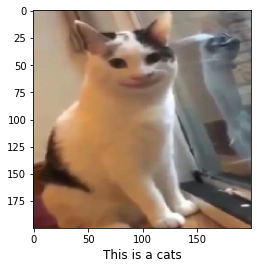

In [190]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for k in uploaded.keys():
    path = "./" + k
    img = image.load_img(path, target_size = (200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)

    print("Classes's values = ", classes)

    if (classes[0] > 0.5):
        plt.imshow(img)
        plt.xlabel("This is a dogs", size = 12)
    else:
        plt.imshow(img)
        plt.xlabel("This is a cats", size = 12)